<a href="https://colab.research.google.com/github/Kousikdutta1/Online-Retail-Customer-Segmentation/blob/main/Kousik_Dutta_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Identification of major customer segments on a transactional dataset </u></b>

## <b> Problem Description </b>

###**In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

## **Introduction**

<b>**Customer segmentation is the practice of dividing a company's customers into groups that reflect similarity among customers in each group based on their shared behaviour or other attributes. Customer segmentation has the potential to allow marketers to address each customer in the most effective way. Using the large amount of data available on customers (and potential customers), a customer segmentation analysis allows marketers to identify discrete groups of customers with a high degree of accuracy based on demographic, behavioral and other indicators.The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business. The groups should be homogeneous within them and should also be heterogeneous to each other. The main goal is to identify customers that are most profitable and loyal and the ones who churned out, to prevent further loss of customers by redefining company policies. Having a large number of customers, each with different needs it is difficult to find which customer is most important for business and target them with an appropriate strategy.**<b>

**The content of the notebook includes :-**

* **Data Preparation**
* **Data Preprocessing**
* **Feature Engineering**

#**Data Preparation**

###**1. Importing The Libraries and The Dataset**

In [96]:
# Importing Required Libraries for our analysis 

import pandas as pd
import numpy as np

# For plots and Visualizations

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits import mplot3d
from yellowbrick.cluster import SilhouetteVisualizer

# To scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Different Clustering Algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# To get optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage

# Metrics to evaluate the clusters
from sklearn.metrics import silhouette_score,silhouette_samples

# To avoid unnecessary warnings, let's import warnings also
import warnings
warnings.filterwarnings('ignore')

###**2. Let's Mount The Drive and Import The Dataset**

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# Let's define url path of the dataset

path = '/content/drive/MyDrive/Colab Notebooks/Online Retail Customer Segmentation/Online Retail.xlsx'

# Now let's import dataset to create a dataframe

cust_df = pd.read_excel(path)

###**3. Understanding the Dataset**

In [99]:
# Let's check the shape of the dataframe

print('Shape of the dataset is :', cust_df.shape)

Shape of the dataset is : (541909, 8)


* **In our dataset we have 541909 rows and 8 columns.**

In [100]:
# Checking all the columns present in our dataset

cust_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [101]:
# Checking top 5 records in DataFrame

cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [102]:
# Checking bottom 5 records in DataFrame

cust_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587.0,22613.0,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587.0,22899.0,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587.0,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587.0,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587.0,22138.0,BAKING SET 9 PIECE RETROSPOT,3.0,2011-12-09 12:50:00,4.95,12680.0,France


In [103]:
# Let's check the datatypes and null values of the dataset

cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB



* **As it can be seen from above that CustomerID, Description columns are having null values.**

In [104]:
# Let's check the statistical description of the dataset

cust_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### <b>4. Data Description </b>

### <b>Attribute Information : </b>

*  **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
*  **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
*  **Description:** Product (item) name. Nominal.
*  **Quantity:** The quantities of each product (item) per transaction. Numeric.
*  **InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.
*  **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.
*  **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*  **Country:** Country name. Nominal, the name of the country where each customer resides.

#**Data Preprocessing**

###**1. Missing Value Analysis**

**Real world data often has a lot of missing values. The cause of missing values can be failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many of the machine learnng algorithms do not support missing values.**

In [105]:
#  Let's check the total missing data 

cust_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* **It can be seen from above that there are missing data in our dataset.**

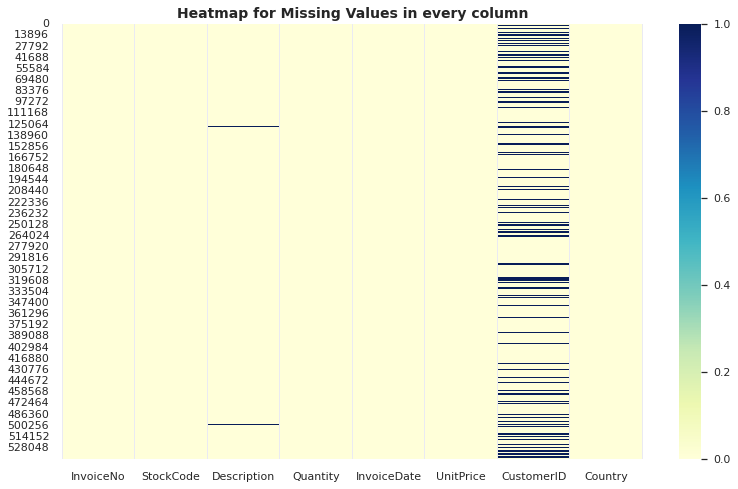

In [106]:
# Checking for missing values in our dataset with the help of heatmap.

plt.figure(figsize = (13,8))
sns.heatmap(cust_df.isnull(), cmap = 'YlGnBu')
plt.title('Heatmap for Missing Values in every column',weight = 'bold', fontsize = 14)
plt.show();

In [107]:
# Percentage of missing data per category

Total_missing_data = cust_df.isnull().sum().sort_values(ascending = False)
Total_percentage = (cust_df.isnull().sum() / cust_df.isnull().count()).sort_values(ascending = False) * 100
missing_data_concat = pd.concat([Total_missing_data, round((Total_percentage),2)], axis = 1, keys = ["Total No of Missing Values", "Percentage of Missing Values"])
missing_data = missing_data_concat[missing_data_concat['Total No of Missing Values']>0]
missing_data

,Total No of Missing Values,Percentage of Missing Values
CustomerID,135080,24.93
Description,1454,0.27


* **It is clear from above that CustomerID has the highest percentage of missing values followed by Description column.**

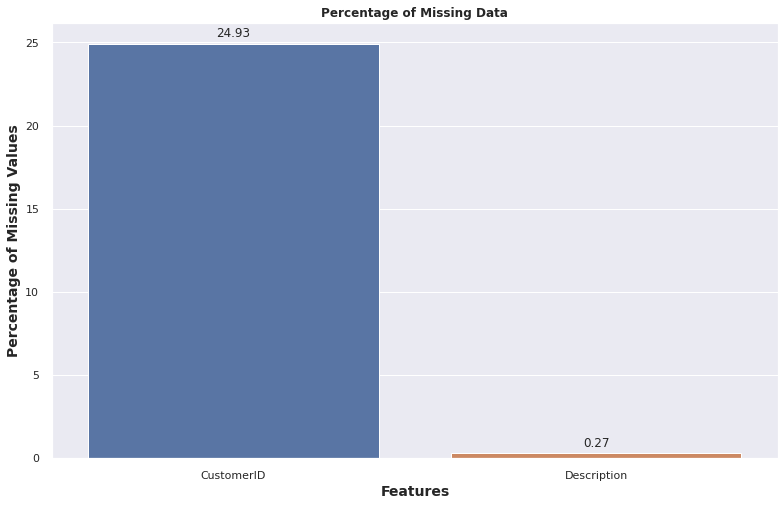

In [108]:
# Let's visualize the percentage of missing values

plt.figure(figsize = (13,8))
sns.set(style = 'darkgrid')
eval = sns.barplot(x = missing_data.index, y = missing_data['Percentage of Missing Values'], data = missing_data)
plt.title('Percentage of Missing Data', weight = 'bold')
plt.xlabel('Features', fontsize = 14, weight = 'bold')
plt.ylabel('Percentage of Missing Values', fontsize = 14, weight = 'bold')

for i in eval.patches:
    eval.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show();




**As we can see from above 'CustomerID' has the highest percentage of missing values followed by 'Description' column - these features are having missing values. We will treat them as we go ahead in our analysis.**

In [109]:
# Total Number of Null Values

print("Total number of null values in the data set : "  , cust_df.isna().sum().sum())

# Let's count all the rows which contain missing values

count = 0
for i in cust_df.isna().sum(axis = 1) :
  if i>0 :
    count = count + 1
print('Total number of rows with missing values is ', count)
print(f'Percentage of rows which are having missing values in the entire datset : { round((count/ len(cust_df.index))*100, 2) } %')

Total number of null values in the data set :  136534
Total number of rows with missing values is  135080
Percentage of rows which are having missing values in the entire datset : 24.93 %


**As it is not possible to impute CustomerID column with some value, we will not be able to form any clusters with those missing CustomerID. We will drop the missing values from the dataset in our further analysis.**

###**2. Handling Missing Data**

In [110]:
# Let's first check the total number of unique values in every feature of the dataset

for i in cust_df.columns.tolist() :
  print(f"Total number of unique values in '{i}' is : ", cust_df[i].nunique())

Total number of unique values in 'InvoiceNo' is :  25900
Total number of unique values in 'StockCode' is :  4070
Total number of unique values in 'Description' is :  4223
Total number of unique values in 'Quantity' is :  722
Total number of unique values in 'InvoiceDate' is :  23260
Total number of unique values in 'UnitPrice' is :  1630
Total number of unique values in 'CustomerID' is :  4372
Total number of unique values in 'Country' is :  38


In [111]:
# Let's drop the rows having null values

cust_df.dropna(subset = ['CustomerID'], inplace = True)



In [112]:
# Let's check the shape of the dataset after removing all the rows having null values

print('Shape of the refreshed dataset is :', cust_df.shape)

Shape of the refreshed dataset is : (406829, 8)


In [113]:
#  Let's check the total missing data , if there is any

cust_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Hurray! As it can be seen from above that we have successfully handled all the missing values in the dataset.**

###**3. Handling Duplicate Data**

**It is important to remove duplicate records from the dataset, duplicate records may come from wrong collection of the data, it will add extra weight to our dataset and also increase time of the training.**

In [114]:
# Let's check if any duplicate is present

print('Total number of duplicate rows :', cust_df.duplicated().sum())

Total number of duplicate rows : 5225


In [115]:
# Duplicate record gives extra weight to the dataset, it is better to remove them

cust_df.drop_duplicates(inplace = True)

# Let's check the shape of the dataset after removing all the duplicate values

print('Shape of the dataset after removing duplicate is :', cust_df.shape)

Shape of the dataset after removing duplicate is : (401604, 8)


###**Let's change the datatype of the columns** 

In [116]:
# Let's change the datatype of 'Quantity', 'UnitPrice' and 'CustomerID' column to the Integer

cust_df['Quantity'] = cust_df['Quantity'].astype(int)

cust_df['UnitPrice'] = cust_df['UnitPrice'].astype(int)

cust_df['CustomerID'] = cust_df['CustomerID'].astype(int)

###**Let's check why 'Invoice No' column is having object datatype.**

In [117]:
# Let's workout on the object column 

print('Value count for the feature : InvoiceNo')
print('\n')
print(cust_df['InvoiceNo'].value_counts())


Value count for the feature : InvoiceNo


576339.0    542
579196.0    533
580727.0    529
578270.0    442
573576.0    435
           ... 
C560912       1
560913.0      1
560917.0      1
572879.0      1
553049.0      1
Name: InvoiceNo, Length: 22190, dtype: int64


In [118]:
# Let's check 'Invoice No' which contains letter 'C'

cust_df['InvoiceNo'] = cust_df['InvoiceNo'].astype(str)

cust_df[cust_df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4,15311,United Kingdom
235,C536391,22556.0,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1,17548,United Kingdom
236,C536391,21984.0,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0,17548,United Kingdom
237,C536391,21983.0,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144.0,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224,15498,United Kingdom
541715,C581568,21258.0,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10,15311,United Kingdom
541716,C581569,84978.0,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1,17315,United Kingdom


**As it is clear from the above observation that 'InvoiceNo' column is having 'C' at begining , which indicates 'Cancellation'. We will remove those cancelled 'InvoiceNo' as we go ahead in our analysis.**

In [119]:
# Let's drop those records from 'InvoiceNo' column , which  contains 'C' in the begining

cust_df = cust_df[~ cust_df['InvoiceNo'].str.contains('C')]

# Let's check the shape of the dataset after removing all the Cancellation rows

print('Shape of the dataset after removing Cancellation is :', cust_df.shape)

Shape of the dataset after removing Cancellation is : (392732, 8)


In [120]:
# Let's change the datatype of 'InvoiceNo' column to the Integer

cust_df['InvoiceNo'] = pd.to_numeric(cust_df['InvoiceNo'])

cust_df['InvoiceNo'] = cust_df['InvoiceNo'].astype(int)

In [121]:
# Let's check the info of the dataset after doing operations on the datatypes

cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  int64         
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  int64         
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 27.0+ MB


**Yes! so we have converted 'InvoiceNo', 'Quantity', UnitPrice', 'CustomerID' columns to integer datatype.**

#**Feature Engineering**

In [122]:
# Creating new features from the 'InvoiceDate' column

cust_df['year'] = cust_df['InvoiceDate'].apply(lambda x: x.year)
cust_df['month'] = cust_df['InvoiceDate'].apply(lambda x: x.month_name())
cust_df['day'] = cust_df['InvoiceDate'].apply(lambda x: x.day_name())
cust_df['hour'] = cust_df['InvoiceDate'].apply(lambda x: x.hour)

In [123]:
# creting a new feature 'Total Amount' from 'Unit Price' and 'Quantity' column
# 'Total Amount' = 'Unit Price' * 'Quantity'

cust_df['Total Amount'] = cust_df['Quantity'] * cust_df['UnitPrice']

In [124]:
# Creating a new feature 'Time type' based on hours to define whether its 'Morning' , 'Afternoon' or 'Evening'

def time_type(time) :
  if (time > 5 and time < 12) :
    return 'Morning'
  elif (time > 11 and time < 18) :
    return 'Afternoon'
  else :
    return 'Evening'  

In [125]:
cust_df['Time_type'] = cust_df['hour'].apply(time_type)

In [126]:
# Let's check the dataset 

cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,Total Amount,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2,17850,United Kingdom,2010,December,Wednesday,8,12,Morning
1,536365,71053.0,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,2010,December,Wednesday,8,18,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2,17850,United Kingdom,2010,December,Wednesday,8,16,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,2010,December,Wednesday,8,18,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,2010,December,Wednesday,8,18,Morning


**Yes! we have successfully created 6 new columns ['year', 'month', 'day', 'hour', 'Total Amount', 'Time Type'] from the dataset.**